<a href="https://colab.research.google.com/github/kmkurumi/Whisper-VITS/blob/main/%E3%80%8CWhisper_Vits_Japanese_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##### 点击上方菜单栏的“代码执行程序”，在“更改运行时类型”中选择硬件加速器为GPU
##### 避免Colab断开连接：按Ctrl+Shift+I等待弹窗然后点击控制台，输入以下内容并回车：


```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()}
setInterval(ConnectButton,60000);
```



### Download Whisper

In [ ]:
!git clone https://github.com/AlexandaJerry/whisper-vits-japanese

Cloning into 'whisper-vits-japanese'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 249 (delta 71), reused 52 (delta 33), pack-reused 132
Receiving objects: 100% (249/249), 44.09 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
%%capture
!pip install git+https://github.com/openai/whisper.git

In [ ]:
!cp -r /content/whisper-vits-japanese/whisper/transcribe.py /usr/local/lib/python3.8/dist-packages/whisper
!cp -r /content/whisper-vits-japanese/whisper/utils.py /usr/local/lib/python3.8/dist-packages/whisper

In [ ]:
import whisper

### Prepare Data for Whisper ASR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### 此处是唯一需要自己改动的地方：自己的音频zip路径

In [ ]:
#目前支持日语,其余语言需替换text文件夹cleaner和symbols以及config文件夹中isla_base.json的cleaner参数
#如果有自己的音频,只需用自己的音频.zip路径替换掉/content/drive/MyDrive/isla_base/isla.zip即可(音频需为wav)
#注意"*/*.wav"适用于压缩包内有子文件夹,然后子文件夹内存放着wav
#如果压缩包内直接就是音频wav,那么需要把"*/*.wav"替换为"*.wav"

#!unzip -j /content/drive/MyDrive/isla_base/isla.zip "*/*.wav" -d /content/whisper-vits-japanese/audio

In [ ]:
#如果没有训练数据只想体验的话，这里只能暂时借用下White老师的数据集了，作为入门材料真是万分感谢
%cd /content/whisper-vits-japanese
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H6aqdGP-h-MT7XAVk870Ql4d3QrJT-7o' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1H6aqdGP-h-MT7XAVk870Ql4d3QrJT-7o" -O "isla.zip" && rm -rf /tmp/cookies.txt
!unzip -j /content/whisper-vits-japanese/isla.zip "*/*.wav" -d /content/whisper-vits-japanese/audio

/content/whisper-vits-japanese
--2023-03-01 14:33:58--  https://docs.google.com/uc?export=download&confirm=t&id=1H6aqdGP-h-MT7XAVk870Ql4d3QrJT-7o
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.139, 172.217.194.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/honpqrnfqsu78q58buacfq4q0mbroja0/1677681225000/03760087302420967133/*/1H6aqdGP-h-MT7XAVk870Ql4d3QrJT-7o?e=download&uuid=9294da4a-6d85-4e7b-85c4-1b9164610004 [following]
--2023-03-01 14:33:58--  https://doc-10-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/honpqrnfqsu78q58buacfq4q0mbroja0/1677681225000/03760087302420967133/*/1H6aqdGP-h-MT7XAVk870Ql4d3QrJT-7o?e=download&uuid=9294da4a-6d85-4e7b-85c4-1b9164610004
Resolving doc-10-8s-docs.googleusercontent.com (doc-10-8s-docs.googleu

In [ ]:
#识别过程总共花费50分钟(大概是音频总长的三分之一到一半左右)
!whisper -i /content/whisper-vits-japanese/audio -o /content/whisper-vits-japanese/srt_files --language Japanese

2023-03-01 14:34:49.567680: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-01 14:34:49.567791: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-01 14:34:49.567809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
100%|███████████████████████████████████████| 461M/461M [00:07<00:00, 61.1MiB/s]
[00:00.000 --> 00:04.760] 自分では苦手にしてたんだけど
[00:00.000 --> 00:05.000] 写真がお礼が終わりならきちんと撮らなく

In [ ]:
#auto.py会根据Whisper导出的srt自动切片音频、转写文本、转采样率为22050HZ
#最后会把适配VIST的数据格式汇总在/content/whisper-vits-japanese/filelists
#然后音频数据会被放在/content/whisper-vits-japanese/sliced_audio文件夹里
!pip install pydub
%cd /content/whisper-vits-japanese
!python auto.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/whisper-vits-japanese
Folder ./srt_files/ exists.. continuing processing..
Folder ./audio/ exists.. continuing processing..
Encoding srt_file(s) to utf8...
Encoding of 1950-file(s) changed
---------------------------------------------------------------------
Extracting information from srt_file(s) to csv_files
1950-file(s) converted and saved as csv-files to ./csv
---------------------------------------------------------------------
Downsampling wav files...
File  1  completed: pm2-16_isl0028
File  2  completed: pm2-21_isl0027
File  3  completed: pm3-10_isl0045
File  4  completed: pm2-07_isl0033
File  5  completed: pm2-02_isl0023
File  6  completed: pm_a01_02_isl0053
File  7  completed: pm2-11_isl0032
File  8  completed: pm3-15_isl0039
File  9  completed: pm3-24_isl0008
File  10  completed: pm3-09_isl0023
File  11  completed: pm2-22_isl0014
File  12  completed: pm2-22_isl0024
Fil

### Install Requirements of VITS

In [ ]:
!pip install -r requirements.txt
!sudo apt-get install espeak -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 KB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.3/238.3 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.1 MB/s eta 0:00:00
    

### Alignment and Text Conversion

In [10]:
import os
path = "/content/whisper-vits-japanese"
os.chdir(path)
print(os.getcwd())

/content/whisper-vits-japanese


In [11]:
%cd monotonic_align
!python setup.py build_ext --inplace
%cd ..

/content/whisper-vits-japanese/monotonic_align
Compiling core.pyx because it changed.
[1/1] Cythonizing core.pyx
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/whisper-vits-japanese/monotonic_align/core.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'monotonic_align.core' extension
creating build
creating build/temp.linux-x86_64-3.8
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.8/dist-packages/numpy/core/include -I/usr/include/python3.8 -c core.c -o build/temp.linux-x86_64-3.8/core.o
creating /content/whisper-vits-japanese/monotonic_align/monotonic_align
x

In [12]:
import os
path = "/content/whisper-vits-japanese"
os.chdir(path)
print(os.getcwd())

/content/whisper-vits-japanese


In [13]:
#如果输出提示nophoneme这种情况，检查下/content/whisper-vits-japanese/filelists的两个txt文件里有没有出现英文转写
!python preprocess.py --text_index 1 --text_cleaners japanese_cleaners --filelists /content/whisper-vits-japanese/filelists/train_filelist.txt /content/whisper-vits-japanese/filelists/val_filelist.txt

START: /content/whisper-vits-japanese/filelists/train_filelist.txt
Downloading: "https://github.com/r9y9/open_jtalk/releases/download/v1.11.1/open_jtalk_dic_utf_8-1.11.tar.gz"
dic.tar.gz: 100% 22.6M/22.6M [00:00<00:00, 30.9MB/s]
Extracting tar file /usr/local/lib/python3.8/dist-packages/pyopenjtalk/dic.tar.gz
START: /content/whisper-vits-japanese/filelists/val_filelist.txt


### Train

In [14]:
!python train.py -c configs/isla_base.json -m isla_base

[INFO] {'train': {'log_interval': 200, 'eval_interval': 1000, 'seed': 1234, 'epochs': 800, 'learning_rate': 0.0002, 'betas': [0.8, 0.99], 'eps': 1e-09, 'batch_size': 24, 'fp16_run': True, 'lr_decay': 0.999875, 'segment_size': 8192, 'init_lr_ratio': 1, 'warmup_epochs': 0, 'c_mel': 45, 'c_kl': 1.0}, 'data': {'training_files': 'filelists/train_filelist.txt.cleaned', 'validation_files': 'filelists/val_filelist.txt.cleaned', 'text_cleaners': ['japanese_cleaners'], 'max_wav_value': 32768.0, 'sampling_rate': 22050, 'filter_length': 1024, 'hop_length': 256, 'win_length': 1024, 'n_mel_channels': 80, 'mel_fmin': 0.0, 'mel_fmax': None, 'add_blank': True, 'n_speakers': 0, 'cleaned_text': True}, 'model': {'inter_channels': 192, 'hidden_channels': 192, 'filter_channels': 768, 'n_heads': 2, 'n_layers': 6, 'kernel_size': 3, 'p_dropout': 0.1, 'resblock': '1', 'resblock_kernel_sizes': [3, 7, 11], 'resblock_dilation_sizes': [[1, 3, 5], [1, 3, 5], [1, 3, 5]], 'upsample_rates': [8, 8, 2, 2], 'upsample_init

### Inference

In [15]:
#如果出现大批量的log日志显示在输出的话
#在"代码执行程序"下拉菜单选择"重新启动代码程序"
#再从该代码框开始，重新运行进行推断和输出语音
import os
path = "/content/whisper-vits-japanese"
os.chdir(path)
print(os.getcwd())

%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import os
import json
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

import commons
import utils
from data_utils import TextAudioLoader, TextAudioCollate, TextAudioSpeakerLoader, TextAudioSpeakerCollate
from models import SynthesizerTrn
from text.symbols import symbols
from text import text_to_sequence

from scipy.io.wavfile import write


def get_text(text, hps):
    text_norm = text_to_sequence(text, hps.data.text_cleaners)
    if hps.data.add_blank:
        text_norm = commons.intersperse(text_norm, 0)
    text_norm = torch.LongTensor(text_norm)
    return text_norm

/content/whisper-vits-japanese


RuntimeError: ignored

ImportError: ignored

In [ ]:
hps = utils.get_hparams_from_file("/content/whisper-vits-japanese/configs/isla_base.json")

In [ ]:
net_g = SynthesizerTrn(
    len(symbols),
    hps.data.filter_length // 2 + 1,
    hps.train.segment_size // hps.data.hop_length,
    **hps.model).cuda()
_ = net_g.eval()

#下面的这个isla_base/G_6000.pth需要换成目标文件夹里数字最大的G_????.pth
_ = utils.load_checkpoint("/content/whisper-vits-japanese/logs/isla_base/G_19000.pth", net_g, None)

In [ ]:
stn_tst = get_text("ビエザイゼリ,ーファーディエン", hps) #别在这里发癫 停顿可用…
with torch.no_grad():
    x_tst = stn_tst.cuda().unsqueeze(0)
    x_tst_lengths = torch.LongTensor([stn_tst.size(0)]).cuda()
    audio = net_g.infer(x_tst, x_tst_lengths, noise_scale=.667, noise_scale_w=0.8, length_scale=1)[0][0,0].data.cpu().float().numpy()
ipd.display(ipd.Audio(audio, rate=hps.data.sampling_rate))

In [ ]:
stn_tst = get_text("ジウザイジョーァリ,ーファーディエン", hps) #就在这里发癫 停顿可用…
with torch.no_grad():
    x_tst = stn_tst.cuda().unsqueeze(0)
    x_tst_lengths = torch.LongTensor([stn_tst.size(0)]).cuda()
    audio = net_g.infer(x_tst, x_tst_lengths, noise_scale=.667, noise_scale_w=0.8, length_scale=1)[0][0,0].data.cpu().float().numpy()
ipd.display(ipd.Audio(audio, rate=hps.data.sampling_rate))

### Save Materials and Checkpoints to Drive for Future Usage

In [17]:
#把checkpoint存入google drive(这里用了RT防止递归式复制到目标文件夹)
!cp -RT /content/whisper-vits-japanese/logs/ /content/drive/MyDrive/logs/
#把音频文件和对应抄本存入google drive
!cp -RT /content/whisper-vits-japanese/sliced_audio/ /content/drive/MyDrive/sliced_audio/
!cp -RT /content/whisper-vits-japanese/filelists/ /content/drive/MyDrive/filelists/

  保存好后需要做的检查：
1. 确认下Drive没有爆内存(免费用户的存储上限为15G)
2. 检查sliced_audio文件夹下的spec.pt可被双击打开
3. [更新了spec.pt损坏后自动生成新spec.pt以增强恢复训练容错率]

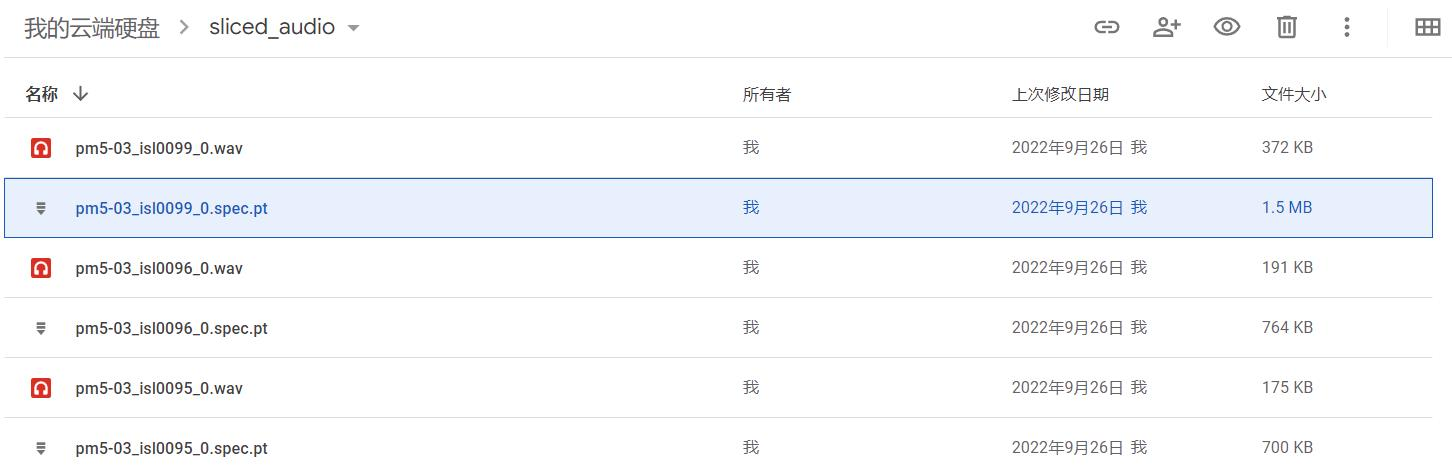

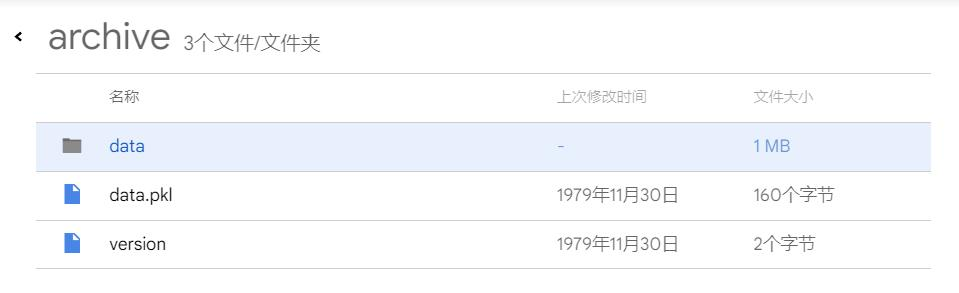

### Restart from Lastest Checkpoint in the Next Time



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/AlexandaJerry/whisper-vits-japanese

Cloning into 'whisper-vits-japanese'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 148 (delta 13), reused 23 (delta 7), pack-reused 108
Receiving objects: 100% (148/148), 43.81 MiB | 36.39 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
#把google drive的checkpoint恢复到文件夹
!cp -RT /content/drive/MyDrive/logs/ /content/whisper-vits-japanese/logs/
#把音频文件和对应抄本恢复到文件夹
!cp -RT /content/drive/MyDrive/sliced_audio/ /content/whisper-vits-japanese/sliced_audio/
!cp -RT /content/drive/MyDrive/filelists/ /content/whisper-vits-japanese/filelists/

In [ ]:
%cd /content/whisper-vits-japanese
!pip install -r requirements.txt
!sudo apt-get install espeak -y
%cd monotonic_align
!python setup.py build_ext --inplace
%cd ..

In [ ]:
!python train.py -c configs/isla_base.json -m isla_base

[INFO] {'train': {'log_interval': 200, 'eval_interval': 1000, 'seed': 1234, 'epochs': 400, 'learning_rate': 0.0002, 'betas': [0.8, 0.99], 'eps': 1e-09, 'batch_size': 24, 'fp16_run': True, 'lr_decay': 0.999875, 'segment_size': 8192, 'init_lr_ratio': 1, 'warmup_epochs': 0, 'c_mel': 45, 'c_kl': 1.0}, 'data': {'training_files': 'filelists/train_filelist.txt.cleaned', 'validation_files': 'filelists/val_filelist.txt.cleaned', 'text_cleaners': ['japanese_cleaners'], 'max_wav_value': 32768.0, 'sampling_rate': 22050, 'filter_length': 1024, 'hop_length': 256, 'win_length': 1024, 'n_mel_channels': 80, 'mel_fmin': 0.0, 'mel_fmax': None, 'add_blank': True, 'n_speakers': 0, 'cleaned_text': True}, 'model': {'inter_channels': 192, 'hidden_channels': 192, 'filter_channels': 768, 'n_heads': 2, 'n_layers': 6, 'kernel_size': 3, 'p_dropout': 0.1, 'resblock': '1', 'resblock_kernel_sizes': [3, 7, 11], 'resblock_dilation_sizes': [[1, 3, 5], [1, 3, 5], [1, 3, 5]], 'upsample_rates': [8, 8, 2, 2], 'upsample_init